In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import citipy
from citipy import citipy as cpy

In [3]:
#import linear regress module
from scipy.stats import linregress as lr

In [4]:
#import requests
import requests
from datetime import datetime
import time

#improt API key
from config import weather_api_key as key

#build URL for weather map api call
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + key


In [5]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-90,90, size = 1500)
lat_lngs = zip(lats, lngs)

In [6]:
#add latitudes and longitudes to list
coordinates = list(lat_lngs)

In [7]:
#create list to hold cities
cities = []
#identify nearest city for each lat and lon combo
for coordinate in coordinates:
    city = cpy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is uniquem then add to the cities list
    if city not in cities:
        cities.append(city)

#print city count to comfirm sufficient count
len(cities)

597

In [8]:
#create empty list to hold weather data
city_data = []
#print beginning of logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

#create counters
record_count = 1
set_count = 1

#Loop through all cities in out list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count =1
    
    #create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    #log the URL, record, set numberss and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#added timer so it doesn't exceed 60 calls per min by accident
    time.sleep(1)

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | dublin
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | tazovskiy
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | morondava
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | ostersund
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | bud
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | caravelas
Proces

Processing Record 34 of Set 4 | dundwaraganj
Processing Record 35 of Set 4 | tres arroyos
Processing Record 36 of Set 4 | chochola
Processing Record 37 of Set 4 | kassala
Processing Record 38 of Set 4 | cotonou
Processing Record 39 of Set 4 | castro
Processing Record 40 of Set 4 | mecca
Processing Record 41 of Set 4 | narasannapeta
Processing Record 42 of Set 4 | jiwani
Processing Record 43 of Set 4 | wiarton
Processing Record 44 of Set 4 | punta cardon
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | ekibastuz
Processing Record 48 of Set 4 | khanapur
Processing Record 49 of Set 4 | madimba
Processing Record 50 of Set 4 | goksun
Processing Record 1 of Set 5 | paamiut
Processing Record 2 of Set 5 | nieuw amsterdam
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | port-de-paix
City not found. Skipping...
Processing Record 5 of Set 5 | bukama
Processing Record 6

Processing Record 27 of Set 8 | aksu
Processing Record 28 of Set 8 | itacoatiara
Processing Record 29 of Set 8 | diego de almagro
Processing Record 30 of Set 8 | kos
Processing Record 31 of Set 8 | timra
Processing Record 32 of Set 8 | moyale
Processing Record 33 of Set 8 | keti bandar
Processing Record 34 of Set 8 | islamkot
Processing Record 35 of Set 8 | redcliffe
Processing Record 36 of Set 8 | bad langensalza
Processing Record 37 of Set 8 | mosquera
Processing Record 38 of Set 8 | sangin
Processing Record 39 of Set 8 | cockburn town
Processing Record 40 of Set 8 | alpena
Processing Record 41 of Set 8 | yola
Processing Record 42 of Set 8 | andenes
Processing Record 43 of Set 8 | kaoma
Processing Record 44 of Set 8 | tougue
Processing Record 45 of Set 8 | parry sound
Processing Record 46 of Set 8 | salinopolis
Processing Record 47 of Set 8 | sangmelima
Processing Record 48 of Set 8 | salisbury
Processing Record 49 of Set 8 | cartagena
Processing Record 50 of Set 8 | turayf
Processin

Processing Record 11 of Set 12 | bolshoy tsaryn
City not found. Skipping...
Processing Record 12 of Set 12 | guane
Processing Record 13 of Set 12 | san ramon
Processing Record 14 of Set 12 | glens falls
Processing Record 15 of Set 12 | taoudenni
Processing Record 16 of Set 12 | marrakesh
Processing Record 17 of Set 12 | upala
Processing Record 18 of Set 12 | alto araguaia
Processing Record 19 of Set 12 | virginia beach
Processing Record 20 of Set 12 | bogo
Processing Record 21 of Set 12 | gwanda
Processing Record 22 of Set 12 | hofn
Processing Record 23 of Set 12 | yirol
City not found. Skipping...
Processing Record 24 of Set 12 | madarounfa
Processing Record 25 of Set 12 | villamontes
Processing Record 26 of Set 12 | ambanja
Processing Record 27 of Set 12 | leshukonskoye
Processing Record 28 of Set 12 | priiskovyy
Processing Record 29 of Set 12 | velika gorica
Processing Record 30 of Set 12 | tricase
Processing Record 31 of Set 12 | mangaratiba
Processing Record 32 of Set 12 | lysva
P

In [9]:
len(city_data)

545

In [10]:
#convert array of dicts to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,11.67,60,90,1.34,AR,2021-06-26 20:15:42
1,Jamestown,42.0970,-79.2353,29.62,61,90,4.02,US,2021-06-26 20:12:43
2,Dublin,37.7021,-121.9358,31.88,47,1,4.47,US,2021-06-26 20:15:21
3,Laguna,38.4210,-121.4238,38.47,39,1,0.89,US,2021-06-26 20:11:16
4,Tazovskiy,67.4667,78.7000,4.92,71,0,4.57,RU,2021-06-26 20:15:49


In [11]:
#reordering columns
cols_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[cols_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-06-26 20:15:42,-38.0023,-57.5575,11.67,60,90,1.34
1,Jamestown,US,2021-06-26 20:12:43,42.0970,-79.2353,29.62,61,90,4.02
2,Dublin,US,2021-06-26 20:15:21,37.7021,-121.9358,31.88,47,1,4.47
3,Laguna,US,2021-06-26 20:11:16,38.4210,-121.4238,38.47,39,1,0.89
4,Tazovskiy,RU,2021-06-26 20:15:49,67.4667,78.7000,4.92,71,0,4.57
5,Dikson,RU,2021-06-26 20:15:50,73.5069,80.5464,0.18,87,20,1.00
6,Hithadhoo,MV,2021-06-26 20:15:52,-0.6000,73.0833,28.29,70,100,5.73
7,Arraial Do Cabo,BR,2021-06-26 20:11:13,-22.9661,-42.0278,22.92,73,0,7.20
8,Cape Town,ZA,2021-06-26 20:12:38,-33.9258,18.4232,14.08,75,100,0.89
9,Morondava,MG,2021-06-26 20:15:56,-20.2833,44.2833,19.73,68,0,3.62


In [12]:
#create output file (CSV)
output_data_file = 'weather_data/cities.csv'

#export city_data into csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

## Latitude vs. Temperature

In [13]:
#Extract relevant fields from df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

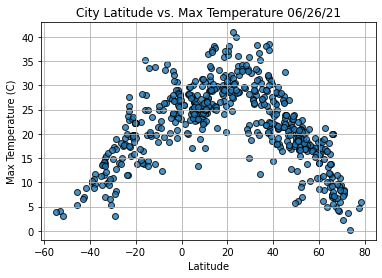

In [14]:
#build scatter plot for lat vs max temp
fig, ax = plt.subplots()
ax.scatter(lats, 
           max_temps, 
           edgecolor='black', lw=1, marker='o', 
           alpha=0.8, label='Cities')

#incorporate graph properties
ax.set_title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
ax.set_ylabel('Max Temperature (C)')
ax.set_xlabel('Latitude')
ax.grid(True)

#save fig
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()


## Latitude vs Humidity

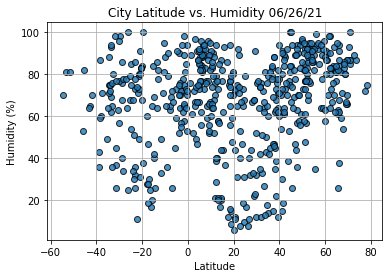

In [15]:
#build scatter plot for lat vs humidity
fig, ax = plt.subplots()
ax.scatter(lats, 
           humidity, 
           edgecolor='black', lw=1, marker='o', 
           alpha=0.8, label='Cities')

#incorporate graph properties
ax.set_title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Latitude')
ax.grid(True)

#save fig
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

## Latitude vs Cloudiness

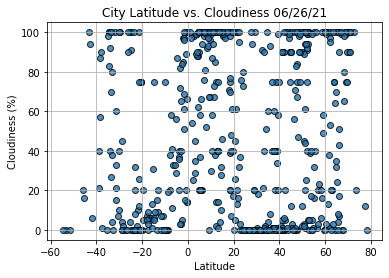

In [16]:
#build scatter plot for lat vs cloudiness
fig, ax = plt.subplots()
ax.scatter(lats, 
           cloudiness, 
           edgecolor='black', lw=1, marker='o', 
           alpha=0.8, label='Cities')

#incorporate graph properties
ax.set_title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('Latitude')
ax.grid(True)

#save fig
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()

## Latitude vs Wind Speed

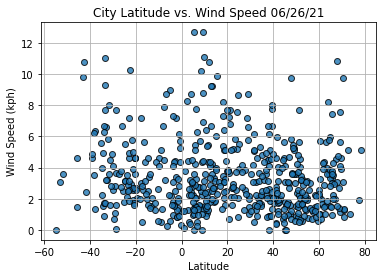

In [17]:
#build scatter plot for lat vs wind speed
fig, ax = plt.subplots()
ax.scatter(lats, 
           wind_speed, 
           edgecolor='black', lw=1, marker='o', 
           alpha=0.8, label='Cities')

#incorporate graph properties
ax.set_title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
ax.set_ylabel('Wind Speed (kph)')
ax.set_xlabel('Latitude')
ax.grid(True)

#save fig
plt.savefig('weather_data/Fig4.png')

#show plot
plt.show()

## Linear Regressions

In [18]:
#create function to perform linear regression on weather data
# and plot regress line and eq with data
def plot_lr(x_values, y_values, title, y_label, txt_xcoords, txt_ycoords):
    #run regress on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = lr(x_values, y_values)
    
    #calculate regress line 'y values' from slope and intercept
    regress_values = x_values*slope + intercept
    #get eq of line
    line_eq = 'y  = ' + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    #create scatter and regression line
    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values)
    ax.plot(x_values, regress_values, c='red')
    #annotate txt for line eq
    ax.text(txt_xcoords, txt_ycoords, line_eq, fontsize=15, color = 'red')
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(y_label)
    plt.show()

In [19]:
#create northern and southern hemisphere dfs
n_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
s_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

### Latitude vs Max Temp

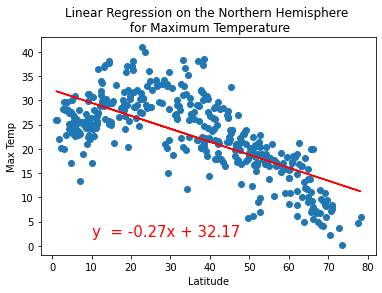

In [20]:
#lr on n hemisphere
x_values = n_hemi_df['Lat']
y_values = n_hemi_df['Max Temp']

#Call function
plot_lr(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
        'Max Temp', 10, 2)

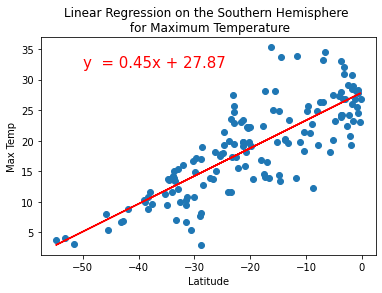

In [21]:
# Linear regression on the Southern Hemisphere
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Max Temp"]
# Call the function.
plot_lr(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',-50,32)

### Latitude vs % Humidity

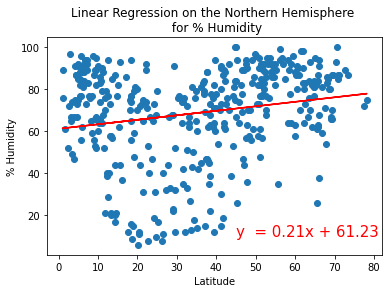

In [22]:
#lr on n hemisphere
x_values = n_hemi_df['Lat']
y_values = n_hemi_df['Humidity']

#Call function
plot_lr(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity',
        '% Humidity', 45, 10)

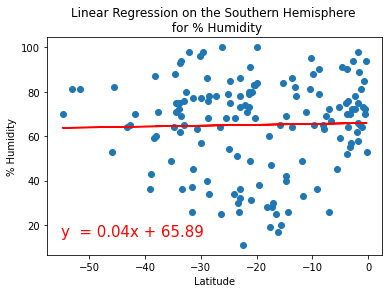

In [23]:
# Linear regression on the Southern Hemisphere
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Humidity"]
# Call the function.
plot_lr(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',-55, 15)

### Latitude vs % Cloudiness

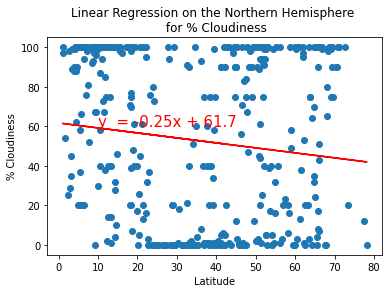

In [24]:
#lr on n hemisphere
x_values = n_hemi_df['Lat']
y_values = n_hemi_df['Cloudiness']

#Call function
plot_lr(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
        '% Cloudiness', 10, 60)

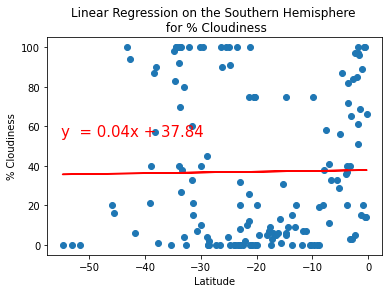

In [25]:
# Linear regression on the Southern Hemisphere
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Cloudiness"]
# Call the function.
plot_lr(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',-55, 55)

### Latitude vs Wind Speed

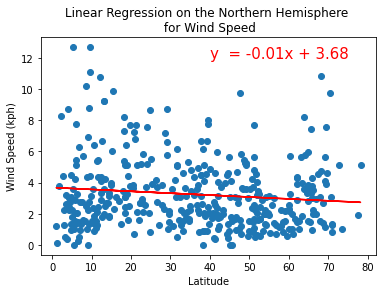

In [26]:
#lr on n hemisphere
x_values = n_hemi_df['Lat']
y_values = n_hemi_df['Wind Speed']

#Call function
plot_lr(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed',
        'Wind Speed (kph)', 40, 12)

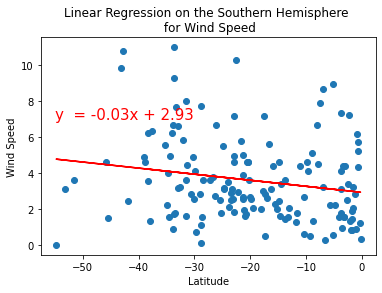

In [27]:
# Linear regression on the Southern Hemisphere
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Wind Speed"]
# Call the function.
plot_lr(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',-55, 7)